In [2]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.ndimage as ndi
import tensorflow as tf

#Read olivetti data
faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
x_train, x_test = faces['images'][0:200],faces['images'][200:]
x_train.shape, x_test.shape
#print(faces.DESCR)

((200, 64, 64), (200, 64, 64))

In [17]:
### edTest(test_olivetti_1) ###
SIZE = 64
cae = tf.keras.models.Sequential() 

### Encoder 
#1. Create a Convolutional layer with ?? filters, kernel size 3, 
#   Relu activation, padding same and input_shape
cae.add(tf.keras.layers.Conv2D(filters=32,  kernel_size= (3, 3),input_shape=(64,64,1),  padding='same', activation='relu'))

#2. Add Maxpool layer with 'same' padding
cae.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='same'))

# # Decoder 
cae.add( tf.keras.layers.Conv2D(32, (1, 1), activation='relu'))
cae.add( tf.keras.layers.UpSampling2D((2, 2)) )
cae.add( tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')) 

cae.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.003))
 
cae.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 1)         33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [18]:
cae.fit(x=x_train.reshape(-1,SIZE,SIZE,1),
        y=x_train.reshape(-1,SIZE,SIZE,1),
        batch_size=32,
        validation_data=(x_test.reshape(-1,SIZE,SIZE,1),x_test.reshape(-1,SIZE,SIZE,1)),
        epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 106ms/step - loss: 0.0256 - val_loss: 0.0229
Epoch 2/30
7/7 [==============================] - 1s 86ms/step - loss: 0.0225 - val_loss: 0.0196
Epoch 3/30
7/7 [==============================] - 1s 90ms/step - loss: 0.0190 - val_loss: 0.0154
Epoch 4/30
7/7 [==============================] - 1s 91ms/step - loss: 0.0145 - val_loss: 0.0113
Epoch 5/30
7/7 [==============================] - 1s 96ms/step - loss: 0.0100 - val_loss: 0.0071
Epoch 6/30
7/7 [==============================] - 1s 91ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 7/30
7/7 [==============================] - 1s 91ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 8/30
7/7 [==============================] - 1s 87ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/30
7/7 [==============================] - 1s 84ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/30
7/7 [==============================] - 1s 89ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 11/30
7/7 [===========

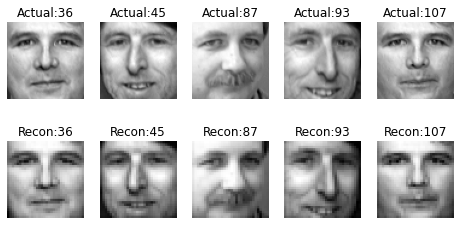

In [19]:
pred_imgs = cae.predict(x_test.reshape(-1,SIZE,SIZE,1))
fig, ax = plt.subplots(2,5, figsize=(8,4))

for i, index in enumerate([ 36, 45, 87, 93,107]):
    ax[0,i].imshow(x_test[index].reshape((SIZE,SIZE)), cmap='gray')
    ax[1,i].imshow(pred_imgs[index].reshape((SIZE,SIZE)), cmap='gray')
    ax[0,i].set_title(f'Actual:{index}') 
    ax[1,i].set_title(f'Recon:{index}') 
    ax[0,i].axis('off')
    ax[1,i].axis('off')